# Import modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from tabulate import tabulate
import warnings

/Users/kobr0v/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
warnings.filterwarnings('ignore')
def rmse(predict, actual):
    score = np.sqrt(MSE(predict, actual))
    return score

RMSE = make_scorer(rmse)

# Read the file and prepare the dataset

In [229]:
file="large_database.xlsx"
database = pd.read_excel(file, usecols=[1,2,3,4,5,11, 9, 12])
X = pd.read_excel(file, usecols=[1,2,3,4,5])
y = pd.read_excel(file, usecols=[9,11,12])
y1= pd.read_excel(file, usecols=[9])
y2= pd.read_excel(file, usecols=[12])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=20)
y1_train=y_train.iloc[:,0]
y2_train=y_train.iloc[:,2]
y1_test=y_test.iloc[:,0]
y2_test=y_test.iloc[:,2]


# Descriptive statistics

In [230]:
database.describe()

,Vol dig,Vol PTV46,Overlap Vol,OV/Vdig,Distance,V45,V45%,Dmoy
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1373.485571,971.240832,44.469771,0.038613,8.298153,40.348828,0.042395,16.659639
std,612.312042,177.198329,34.831949,0.035407,1.983831,34.406977,0.035242,5.506392
min,293.393004,665.105557,2.672223,0.001253,2.191926,0.215625,0.000143,7.771517
25%,912.240196,850.297525,19.104834,0.010301,7.220885,18.377344,0.018851,12.799274
50%,1254.637830,944.967107,32.599803,0.028017,8.151168,28.523437,0.029917,15.544078
75%,1747.808000,1076.448962,62.377415,0.057959,9.749421,55.094531,0.057217,20.164501
max,2911.111661,1503.124779,139.933084,0.182168,12.185881,172.640625,0.158789,32.765113


# Correlation matrix

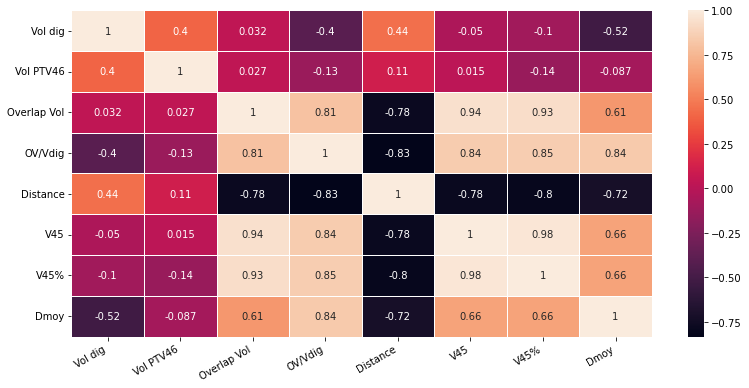

In [231]:
corrmat = database.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()

# Replication of CFJ models

## Linear Regression V45 = F(Overlap Vol)

Training coefficient of determination R2:  0.8754562517157654
Testing coefficient of determination R2:  0.9501134180471098


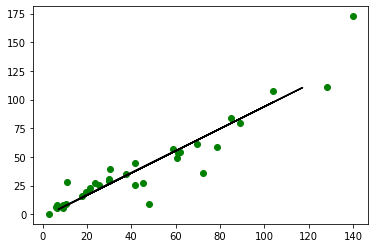

In [232]:
regressor = LinearRegression()
regressor.fit(X_train["Overlap Vol"].array.reshape(-1,1), y1_train.array)
y1_pred = regressor.predict(X_test["Overlap Vol"].array.reshape(-1,1))
r_squared_train = regressor.score(X_train["Overlap Vol"].array.reshape(-1,1),y1_train)
r_squared_test = regressor.score(X_test["Overlap Vol"].array.reshape(-1,1),y1_test)
print("Training coefficient of determination R2: ",r_squared_train)
print("Testing coefficient of determination R2: ",r_squared_test)
plt.scatter(X_train["Overlap Vol"].array.reshape(-1,1), y1_train,color='g')
plt.plot(X_test["Overlap Vol"].array.reshape(-1,1), y1_pred,color='k')

## Linear Regression V45 = F(OV/Vol)

Training coefficient of determination R2:  0.8086483932469174
Testing coefficient of determination R2:  0.3459264875385393


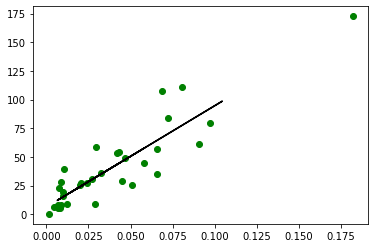

In [233]:
regressor = LinearRegression()
regressor.fit(X_train["OV/Vdig"].array.reshape(-1,1), y1_train.array)
y1_pred = regressor.predict(X_test["OV/Vdig"].array.reshape(-1,1))
r_squared_test = regressor.score(X_test["OV/Vdig"].array.reshape(-1,1),y1_test)
r_squared_train = regressor.score(X_train["OV/Vdig"].array.reshape(-1,1),y1_train)
print("Training coefficient of determination R2: ",r_squared_train)
print("Testing coefficient of determination R2: ",r_squared_test)
plt.scatter(X_train["OV/Vdig"].array.reshape(-1,1), y1_train,color='g')
plt.plot(X_test["OV/Vdig"].array.reshape(-1,1), y1_pred,color='k')

## Linear Regression V45 = F(Distance)

Training coefficient of determination R2:  0.6743918380270656
Testing coefficient of determination R2:  0.3795024601681817


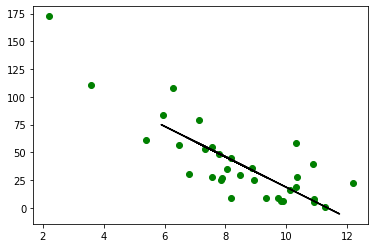

In [234]:
regressor = LinearRegression()
regressor.fit(X_train["Distance"].array.reshape(-1,1), y1_train.array)
y1_pred = regressor.predict(X_test["Distance"].array.reshape(-1,1))
r_squared_test = regressor.score(X_test["Distance"].array.reshape(-1,1),y1_test)
r_squared_train = regressor.score(X_train["Distance"].array.reshape(-1,1),y1_train)
print("Training coefficient of determination R2: ",r_squared_train)
print("Testing coefficient of determination R2: ",r_squared_test)
plt.scatter(X_train["Distance"].array.reshape(-1,1), y1_train,color='g')
plt.plot(X_test["Distance"].array.reshape(-1,1), y1_pred,color='k')

## Multiple Linear Regression V45 = F(Overlap Vol, Distance)

In [235]:
regressor = LinearRegression()
regressor.fit(X_train[["Overlap Vol","Distance"]], y1_train.array)
y1_pred = regressor.predict(X_test[["Overlap Vol","Distance"]])
r_squared_test = regressor.score(X_test[["Overlap Vol","Distance"]],y1_test)
r_squared_test = regressor.score(X_train[["Overlap Vol","Distance"]],y1_train)
print("Training coefficient of determination R2: ",r_squared_train)
print("Testing coefficient of determination R2: ",r_squared_test)

Training coefficient of determination R2:  0.6743918380270656
Testing coefficient of determination R2:  0.883601176377753


# Creating Principal Component Regression model

In [236]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=3)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('feature_union', feature_union))
estimators.append(('linear_regression', LinearRegression()))
PCR = Pipeline(estimators)
kfold = KFold(n_splits=3)
PCR_results1 = cross_val_score(PCR, X, y1, cv=kfold, scoring=RMSE)
PCR_results2 = cross_val_score(PCR, X, y2, cv=kfold, scoring=RMSE)

In [237]:
PCR.fit(X,y1)
out1 = PCR.predict(X)
PCR.fit(X,y2)
out2 = PCR.predict(X)
print("RMSE Y1: ", rmse(out1,y1))
print("RMSE Y2: ", rmse(out2,y2))

pd.DataFrame(out2).to_clipboard()

RMSE Y1:  9.97613459288511
RMSE Y2:  2.673158223016091


# Select ML models to be cross validated

In [238]:
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('XGB', xg.XGBRegressor()))
models.append(('MLP', MLPRegressor()))


# Model evaluation on train dataset

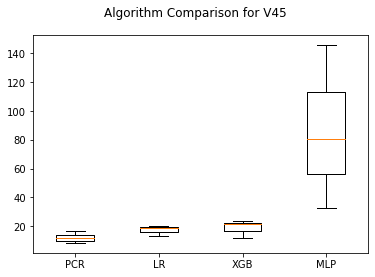

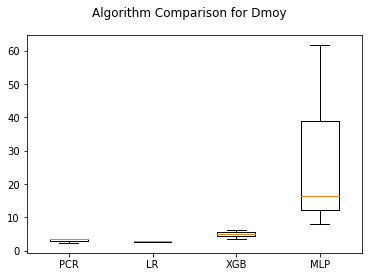

In [239]:
# evaluate each model in turn
results1 = [PCR_results1]
results2 = [PCR_results2]
names = ['PCR']
for name, model in models:
    kfold = KFold(n_splits=3)
    cv_results1 = cross_val_score(model, X_train, y1_train, cv=kfold, scoring=RMSE)
    cv_results2 = cross_val_score(model, X_train, y2_train, cv=kfold, scoring=RMSE)
    results1.append(cv_results1)
    results2.append(cv_results2)
    names.append(name)

# boxplot algorithm comparison
fig1 = plt.figure()
fig1.suptitle('Algorithm Comparison for V45')
ax = fig1.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names)

fig2 = plt.figure()
fig2.suptitle('Algorithm Comparison for Dmoy')
ax = fig2.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names)
plt.show()

# Model Evaluation on test dataset

In [240]:
PCR1 = PCR.fit(X_train,y1_train)
PCR2 = PCR.fit(X_train,y2_train)

PCR1_pred = PCR1.predict(X_test)
PCR2_pred = PCR2.predict(X_test)

In [241]:
rmse1 = rmse(PCR1_pred,y1_test)
rmse2 = rmse(PCR2_pred,y2_test)
TestRes1 = [rmse1]
TestRes2 = [rmse2]
ML_names = ['PCR']

In [242]:
for name, model in models:
    m1 = model.fit(X_train, y1_train)
    m2 = model.fit(X_train, y2_train)
    test_result1 = m1.predict(X_test)
    test_result2 = m2.predict(X_test)
    TestRes1.append(rmse(test_result1,y1_test))
    TestRes2.append(rmse(test_result2,y2_test))
    ML_names.append(name)


# Summary 

In [243]:
print("Model comparison for the V45 output")

    
print(tabulate({"ML model": ML_names, "RMSE": TestRes1}, headers="keys"))

print("-----------------------------------------")

print("Model comparison for the Dmoy output")
    
print(tabulate({"ML model": ML_names, "RMSE": TestRes2}, headers="keys"))

Model comparison for the V45 output
ML model       RMSE
----------  -------
PCR         35.5624
LR          35.5624
XGB         35.1013
MLP         48.2692
-----------------------------------------
Model comparison for the Dmoy output
ML model        RMSE
----------  --------
PCR          3.18283
LR           3.18283
XGB          3.05679
MLP         62.5418
